In [75]:
import matplotlib.pyplot as plt
import nltk


In [76]:

nltk.download('gutenberg')
nltk.download('punkt')

paradise_lost = nltk.corpus.gutenberg.words('milton-paradise.txt')
len(paradise_lost)


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


96825

# Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site.              
-Stem or lemmatize the words and find counts.                            
-Select the top 20 words and create a bar chart.                         
-Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.                                
-Specify why you chose stemming or lemmatization.

In [77]:
#Stem words and find counts

from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords


def stem_words(text):
    nltk.download('wordnet')
    stem = PorterStemmer()

    stemmed_tokens = [stem.stem(token.lower()) for token in paradise_lost]
    stemcounts = Counter(stemmed_tokens)
    return stemcounts

stemcounts = stem_words(paradise_lost)
print(stemcounts)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counter({',': 10198, 'and': 3395, 'the': 2968, ';': 2317, 'to': 2228, 'of': 2050, 'in': 1366, '.': 1254, 'hi': 1170, 'with': 1160, 'thi': 836, ':': 748, 'or': 715, 'that': 704, 'all': 700, 'from': 686, 'not': 626, 'their': 600, "'": 595, 'i': 590, 'but': 588, 'as': 564, 'he': 549, 'a': 545, 'on': 536, 'by': 519, 'for': 465, 'so': 445, 'heaven': 436, 'thou': 432, 'what': 391, 'they': 381, 'be': 367, 'thee': 358, 'him': 350, '-': 334, 'her': 327, 'now': 326, 'thu': 318, 'god': 316, 'which': 310, '?': 301, 'who': 294, 'me': 283, 'shall': 283, 'our': 282, 'at': 269, 's': 262, 'my': 259, 'more': 252, '!': 251, 'then': 230, 'is': 229, 'yet': 228, 'them': 226, 'when': 223, 'earth': 217, 'though': 217, 'whom': 210, 'nor': 206, 'no': 198, 'wa': 197, 'we': 193, 'will': 188, 'us': 187, 'had': 185, 'man': 176, 'if': 176, 'first': 175, 'where': 173, 'such': 169, 'these': 162, 'day': 157, 'how': 153, 'have': 153, 'high': 153, 'than': 146, 'through': 143, 'one': 142, 'it': 140, 'o': 140, 'other': 140

In [78]:
def filter_stem_words(stem_words):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    filter_words = [word for  word in stem_words if word not in stop_words]
    return filter_words

stem_words = stemcounts
filter_words = filter_stem_words(stem_words)

print(filter_words)

['[', 'paradis', 'lost', 'john', 'milton', '1667', ']', 'book', 'man', "'", 'first', 'disobedi', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'tast', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'restor', 'us', 'regain', 'bliss', 'seat', 'sing', 'heavenli', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspir', 'shepherd', 'taught', 'chosen', 'seed', 'begin', 'heaven', 'earth', 'rose', 'chao', ':', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flow', 'fast', 'oracl', 'god', 'thenc', 'invok', 'thi', 'aid', 'adventur', 'song', 'middl', 'flight', 'intend', 'soar', 'abov', 'th', 'aonian', 'mount', 'pursu', 'thing', 'unattempt', 'yet', 'prose', 'rhyme', '.', 'chiefli', 'thou', 'spirit', 'dost', 'prefer', 'befor', 'templ', 'upright', 'heart', 'pure', 'instruct', 'know', 'st', ';', 'wast', 'present', 'mighti', 'wing', 'outspread', 'dove', '-', 'like', 'sat', 'brood', 'vast', 'abyss', 'mad', 'pregnant', 'dark', 'illumin', 'low', 'rais', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


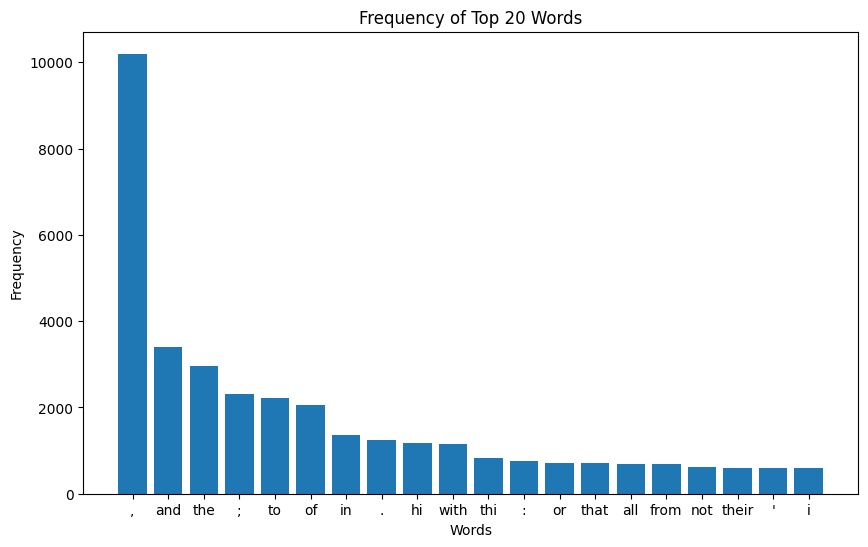

In [79]:

words_number = Counter(stem_words)

top_words = Counter(dict(sorted(words_number.items(), key=lambda item: item[1], reverse=True)[:20]))

    # Plot top 20 words
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Frequency of Top 20 Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

 I chose stemming over lemmatization because it is more basic since precise accuracy was not needed. Also, it allowed for words that had the same root to be counted, so it made the coding easier.

# Perform Vader Sentiment Analysis on the book.               
-Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.htmlLinks to an external site. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [80]:
#Most Negative
from nltk.sentiment.vader import SentimentIntensityAnalyzer
paradise_loster = nltk.corpus.gutenberg.raw('milton-paradise.txt')
def top_sentences(book_text):
    sid = SentimentIntensityAnalyzer()
    sentence = nltk.sent_tokenize(book_text)
    sentiment_scores = [(sentence, sid.polarity_scores(sentence)['compound']) for sentence in sentences]
    sentiment_scores.sort(key=lambda x: x[1])
    return [sentence for sentence, _ in sentiment_scores[-5:]],
           
most_negative= top_sentences(paradise_loster)
for sentence in most_negative:
    print(sentence)


NameError: name 'sentences' is not defined

In [ ]:
def top_sentences(book_text):
    sid = SentimentIntensityAnalyzer()
    sentences = nltk.sent_tokenize(book_text)
    sentiment_scores = [(sentence, sid.polarity_scores(sentence)['compound']) for sentence in sentences]
    sentiment_scores.sort(key=lambda x: x[1])
    return [sentence for sentence, _ in sentiment_scores[5:]],
           
most_positive= top_sentences(paradise_loster)
for sentence in most_positive:
    print(sentence)


["Through many a dark and dreary vale \nThey passed, and many a region dolorous, \nO'er many a frozen, many a fiery alp, \nRocks, caves, lakes, fens, bogs, dens, and shades of death-- \nA universe of death, which God by curse \nCreated evil, for evil only good; \nWhere all life dies, death lives, and Nature breeds, \nPerverse, all monstrous, all prodigious things, \nObominable, inutterable, and worse \nThan fables yet have feigned or fear conceived, \nGorgons, and Hydras, and Chimeras dire.", "Thus began \nOutrage from lifeless things; but Discord first, \nDaughter of Sin, among the irrational \nDeath introduced, through fierce antipathy: \nBeast now with beast 'gan war, and fowl with fowl, \nAnd fish with fish; to graze the herb all leaving, \nDevoured each other; nor stood much in awe \nOf Man, but fled him; or, with countenance grim, \nGlared on him passing.", "I fled; but he pursued (though more, it seems, \nInflamed with lust than rage), and, swifter far, \nMe overtook, his mother

In [ ]:
def top_sentences(book_text):
    sid = SentimentIntensityAnalyzer()
    sentences = nltk.sent_tokenize(book_text)
    sentiment_scores = [(sentence, sid.polarity_scores(sentence)['compound']) for sentence in sentences]
    sentiment_scores.sort(key=lambda x: x[1])
    return [sentence for sentence, _ in sentiment_scores[len(sentiment_scores)//2-3:len(sentiment_scores)//2+2]]
           
most_neutral= top_sentences(paradise_loster)
for sentence in most_neutral:
    print(sentence)


But this I urge, 
Admitting motion in the Heavens, to show 
Invalid that which thee to doubt it moved; 
Not that I so affirm, though so it seem 
To thee who hast thy dwelling here on Earth.
to tell thee how I hate thy beams, 
That bring to my remembrance from what state 
I fell, how glorious once above thy sphere; 
Till pride and worse ambition threw me down 
Warring in Heaven against Heaven's matchless King: 
Ah, wherefore!
Here at least 
We shall be free; th' Almighty hath not built 
Here for his envy, will not drive us hence: 
Here we may reigh secure; and, in my choice, 
To reign is worth ambition, though in Hell: 
Better to reign in Hell than serve in Heaven.
Nor was his name unheard or unadored 
In ancient Greece; and in Ausonian land 
Men called him Mulciber; and how he fell 
From Heaven they fabled, thrown by angry Jove 
Sheer o'er the crystal battlements: from morn 
To noon he fell, from noon to dewy eve, 
A summer's day, and with the setting sun 
Dropt from the zenith, like a

# (3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

My findings from the previous question is that there is definitely a change in tone. For the postive sentences, there is more of an upbeat tone, where the negative ones have a darker tone. However, I do not think it is super correct because when I look at the output, one could argue that some of the tones may have been messed up.

# make a word cloud 

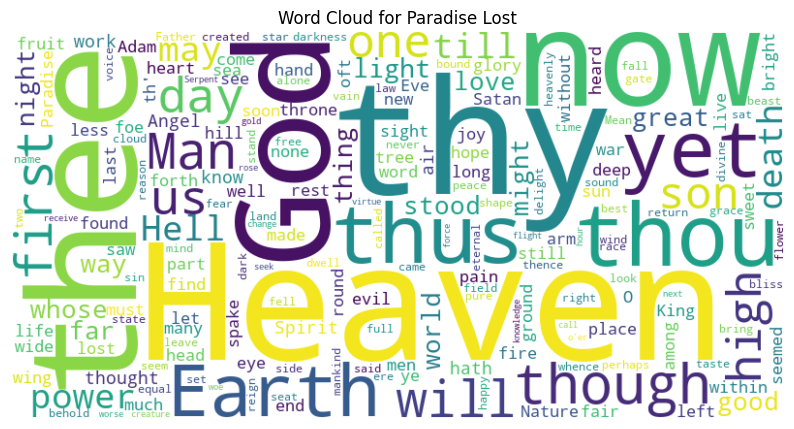

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(paradise_loster)

plt.figure(figsize=(10, 6))

